In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


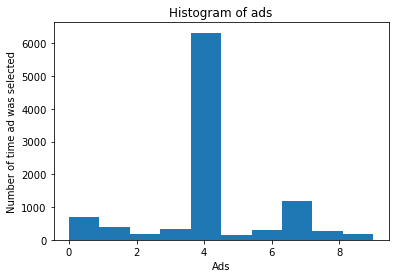

In [7]:
import math

N = 10000                       #Number of rounds or user
d = 10                          #Number of ads out of which we have to find
ads_selected = []
number_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if(number_of_selections[i]>0):
            average_reward = sums_of_rewards[i]/number_of_selections[i]
            delta = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward + delta
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    sums_of_rewards = sums_of_rewards + dataset.values[n,ad]
    total_reward = total_reward + dataset.values[n,ad]

    
plt.hist(ads_selected)
plt.title('Histogram of ads')
plt.xlabel('Ads')
plt.ylabel('Number of time ad was selected')
plt.show()
                    

In [6]:
total_reward

2178